# Trabalho Final - Análise de Dados com Python

Integrantes:

    1) Jurandir Ventura - RM336634
    2) 
    3) 
    4) 

### Qual será seu trabalho aqui?

Basicamente, vocês devem usar todo conhecimento que adquiriram durante o curo e criar um modelo de Regressão Linear cujo RMSE seja em torno de 69000, o que significa que o erro de predição é, em média, de 69000.
Entretanto, para chegar a essa predição, uma série de análise e preparações nos dados devem ser feitas. Vocês devem fazer os todo's que aqui foram deixados a fim de chegar a esse valor numa regressão

In [1]:
# todos os pacotes que serão utilizados foram importados
# há alguns que não vimos em classe, mas parte do processo de avaliação entender como esses pacotes funcionam
# na prática, são muito similares aos que vimos em sala
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import sys

In [2]:
# leitura dos dados
housing = pd.read_csv('bases/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### TODO 1: Análise e visualização de dados

    1) Use o método info e o método describe para entender como os dados se comportam
    2) percebemos que existe uma coluna cujos valores são object. Quantos valores existem para cada atributo presente nessa coluna?
    3) plote um histograma de cada coluna numérica para entender a distribuição dos dados. Use 50 bins e ajuste o tamanho das imagens para (20,15)

O que você pode observar a partir dos histogramas? Os dados podem ser inseridos num algoritmo de machine learning da maneira que estão? Dica: não!! 

Tente descrever o motivo. 

In [3]:
# resposta 1

# O método info traz informações do tipo de classe, índice, quantidade de dados e de colunas, além do tipo de dado para cada coluna.
# Podemos ver no resultado, que das 10 colunas, 9 são do tipo float64 (numérico) e uma é do tipo object (que neste caso é String / Texto).
housing.info()

#O Método describe traz as principais informações estatísticas do dataset. Por tratar números, a coluna 'ocean_proximity' não é exibida, pois contém strings
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
# resposta 2

#Função para contar a quantidade para cada atributo. Neste caso apenas da coluna 'ocean_proximity'
categoric_attr = 'ocean_proximity'
housing[categoric_attr].value_counts()



<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  import sys


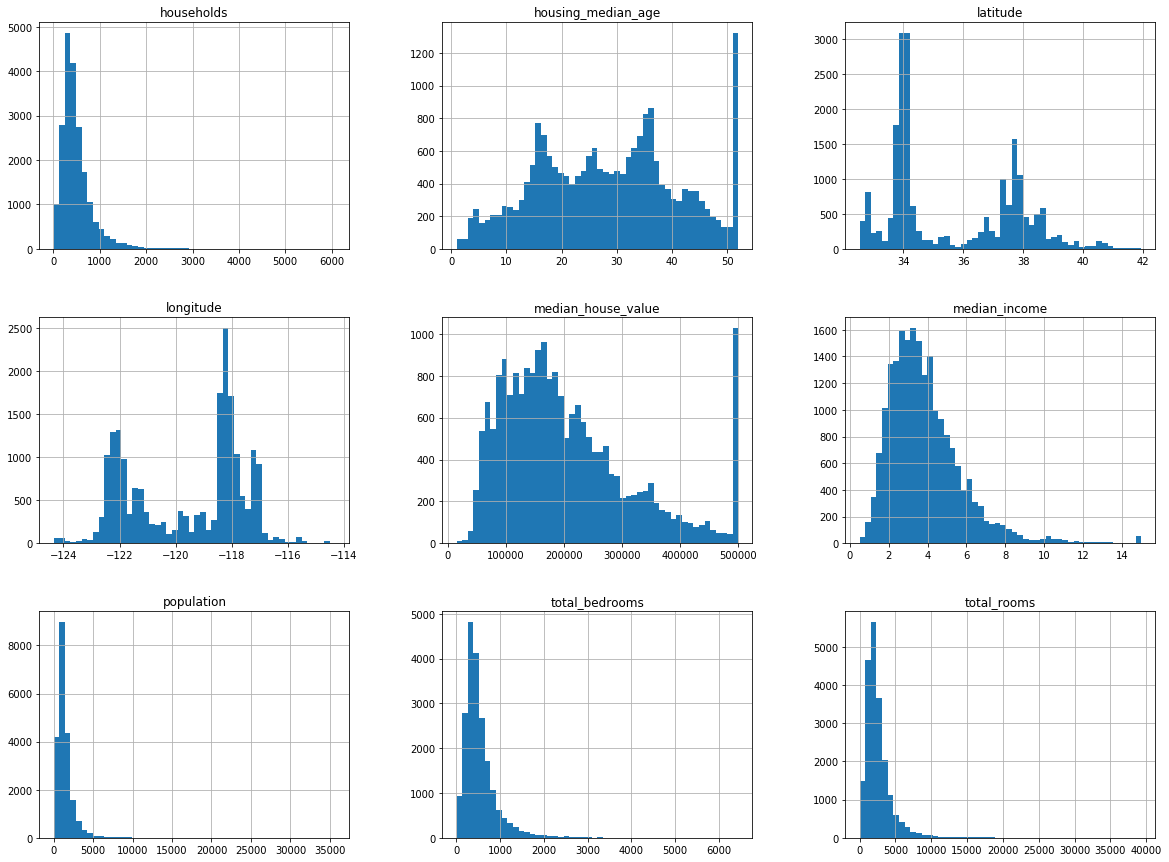

In [5]:
# resposta 3

fig_settings = plt.figure(figsize = (20,15))
#housing_aux = housing.drop(columns ='ocean_proximity') #*trying to remove UserWarning
#housing_aux.info()
#housing_aux.hist(bins = 50, ax = fig_settings.gca()) #*trying to remove UserWarning
housing.hist(bins = 50, ax = fig_settings.gca())
plt.show()

### TODO 2: Criando conjunto de treino e teste
    4) utilizando train_test_split, da Scikit-Learn, separe o conjunto em treino e teste. utilize train_set e test_set como nome de variáveis, separe 20% para conjunto de teste e utilize 42 como random_state

In [6]:
# resposta 4

X_train, X_test = train_test_split(housing, test_size=0.20, random_state=42)


### TODO 3: Correlação e visualização

    5) Quais as variáveis que mais possuem correlação com o atributo median_house_value?
    6) Utilize scatter_matrix, do pandas para visualizar a correlação do atributo median_house_value com os atributos que possuem maior correlação com ele. Ajuste o tamanho das imagens para (12, 8)

In [7]:
# resposta 5

target_attribute = 'median_house_value'
print("As variáveis abaixo estão classificadas por ordem de correlação com o atributo '" + target_attribute + "'")
Correlation = housing.corr()
Correlation[target_attribute].sort_values(ascending=False).drop(target_attribute)

As variáveis abaixo estão classificadas por ordem de correlação com o atributo 'median_house_value'


median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

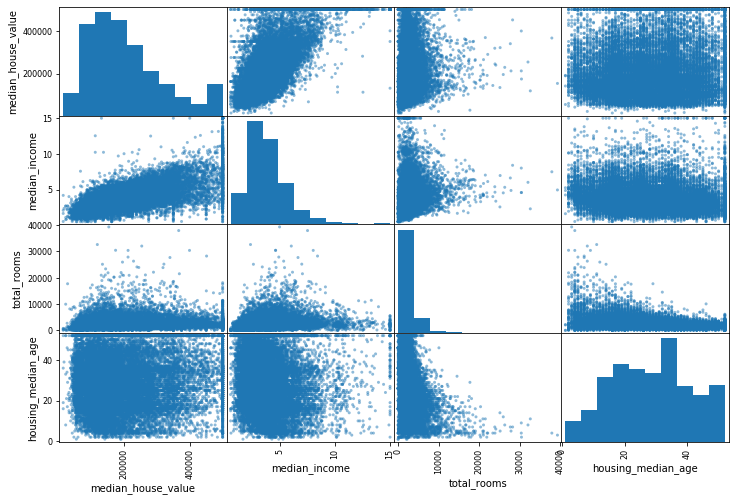

In [8]:
# resposta 6

# Selecionado apenas os 3 primeiros, apesar de apenas o 'median_income' ter uma correlação acima de 50%

housing_corr = housing[['median_house_value','median_income','total_rooms','housing_median_age']]

scatter_matrix(housing_corr, figsize = (12,8))
plt.show()

### TODO 4: Limpeza de dados

Ao usar o método info(), descobrimos que existem alguns dados faltantes no nosso algoritmo. A partir daqui, a variável housing será o conteúdo de train_set, excluindo-se a coluna meta (median_house_value).  Atribua para a variável housing_labels uma cópia de train_set só com informações da coluna meta

    7) use simpleImputer para tratar os valores faltantes. Escolha a estratégia que achar mais conveniente

In [9]:
# resposta 7
# Retirada a variável meta, mas também a coluna que não possui valores numéricos (ocean_proximity)
housing = X_train.drop([target_attribute], axis=1)
housing_labels = X_train[[target_attribute]]

# Removendo coluna não numérica pra ser tratada por manipulação categórica no próximo tópico:
housing_numeric = housing.drop([categoric_attr], axis=1)

imputer = SimpleImputer(strategy = "mean")
imputer.fit(housing_numeric)

housing_transform = imputer.transform(housing_numeric) #neste ponto o Dataframe vira Array

#Esta função retorna para Dataframe do pandas
housing_transform = pd.DataFrame(housing_transform, columns=housing_numeric.columns,
index=housing_numeric.index)

#Visualização do Dataframe pandas
housing_transform


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542
...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192


In [10]:
# Verificando que o imputer funcionou com a opção 'mean'

print('Visualização da Array do imputer.statistics_ ===> \n', imputer.statistics_,
      '\n \n Visualização da Array do housing transform ===> \n',housing_transform.mean().values)

Visualização da Array do imputer.statistics_ ===> 
 [-119.58229046   35.64314922   28.60828488 2642.0047844   538.49685078
 1426.45300388  499.9869186     3.88075426] 
 
 Visualização da Array do housing transform ===> 
 [-119.58229046   35.64314922   28.60828488 2642.0047844   538.49685078
 1426.45300388  499.9869186     3.88075426]


### TODO 4: Manipulação de Atributos categóricos
    7) Utilizando OrdinalEncoder, manipule os valores categóricos para preparar os dados corretamente para algoritmos de machine learning

In [11]:
# resposta 7

housing_categoric = housing[[categoric_attr]]

#Manipulando variável categórica (string) e convertendo para número.
ordinal_encoder = OrdinalEncoder()

housing_categoric_adjusted = ordinal_encoder.fit_transform(housing_categoric)

housing_categoric_adjusted #resultado do OrdinalEncoder


array([[4.],
       [4.],
       [4.],
       ...,
       [0.],
       [0.],
       [3.]])

### TODO 5: Feature Normalization

Com algumas poucas exceções, algoritmos de machine learning não performam bem quando os atributos numéricos possuem escalas diferentes. Este é o caso de nosso dataset, em que o atributo total_rooms possui um range de 6 a 39320 enquanto median_income varia de 0.5 a 15.

Existem duas abordagens conhecidas para trazer os atributos para uma mesma escala: min-max scaling e standardization. 

min-max scaling (normalization) consiste em subtratir o valor minimo e dividir pela subtração de max por min:

\begin{align}
x = \frac{x - min}{max - min}
\end{align}

A Scikit-Learn provê o método MinMaxScaler que realiza essa operação. 

Já standardization consiste em subtrair a média(valores sempre terao média zero) e então dividir pela variância de modo que a distribuição resultante possua variância unitária. 

\begin{align}
x = \frac{x - \mu}{\sigma}
\end{align}

Diferentemente de normalization, standardization não leva os números a um intervalo específico, o que pode ser um problema para algoritmos específicos (por exemplo, redes neurais geralmente esperam um valor de entrada entre o intervalo 0-1). Entretanto, standdardization é muito menos sensível à outiliers. Scikit-learn provêo método StandardScaler para standardization. 

    8) Adeque os valores de cada coluna numérica para que eles fiquem normalizados. Use o método que achar mais conveniente

In [12]:
# resposta 8

#Normalização:

#Usando MinMaxScaler
scaler_minmax = MinMaxScaler()
housing_num_aux1 = scaler_minmax.fit(housing_transform)
housing_num_aux1 = scaler_minmax.transform(housing_transform)


#Usando StandardScaler
standard_scaler = StandardScaler()
housing_num_aux2 = standard_scaler.fit(housing_transform)
housing_num_aux2 = standard_scaler.transform(housing_transform)


#verificando os 2 casos de escala
print('MinMaxScaler ===> \n',housing_num_aux1,
      '\n \n StandardScaler ===> \n', housing_num_aux2)

MinMaxScaler ===> 
 [[0.72908367 0.01702128 0.62745098 ... 0.06437961 0.10228581 0.19032151]
 [0.61653386 0.12978723 0.94117647 ... 0.0367443  0.12415721 0.22845202]
 [0.38545817 0.22446809 0.05882353 ... 0.02556125 0.05508962 0.25216204]
 ...
 [0.59462151 0.15744681 0.68627451 ... 0.04913254 0.08649893 0.16789424]
 [0.23804781 0.53510638 0.2745098  ... 0.04972112 0.09176122 0.35994676]
 [0.19223108 0.55531915 1.         ... 0.07332044 0.20407828 0.14314285]] 
 
 StandardScaler ===> 
 [[ 1.27258656 -1.3728112   0.34849025 ...  0.76827628  0.32290591
  -0.326196  ]
 [ 0.70916212 -0.87669601  1.61811813 ... -0.09890135  0.6720272
  -0.03584338]
 [-0.44760309 -0.46014647 -1.95271028 ... -0.44981806 -0.43046109
   0.14470145]
 ...
 [ 0.59946887 -0.75500738  0.58654547 ...  0.28983345  0.07090859
  -0.49697313]
 [-1.18553953  0.90651045 -1.07984112 ...  0.30830275  0.15490769
   0.96545045]
 [-1.41489815  0.99543676  1.85617335 ...  1.04883375  1.94776365
  -0.68544764]]


### TODO 6: Pipeline de Transformação
    9) crie um pipeline de transformação para tratar os atributos numéricos, outro para tratar os atributos categóricos e um para juntar os dois e preparar todos os dados para entrada num algoritmo de machine learning. Caso queira, pode usar a classe DataFrameSelector vista na aula 4 (recomendável). A variável de saída desse algoritmo deverá se chamar housing_prepared


In [13]:
# resposta 9

from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
    
numeric_attributes = list(housing_numeric)
categoric_attributes = [categoric_attr]

numeric_pipeline = Pipeline([('selector', DataFrameSelector(numeric_attributes)),
                         ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                        ])

categoric_pipeline = Pipeline([('selector', DataFrameSelector(categoric_attributes)),
                               ('categorial_encoder', OrdinalEncoder())
                              ])

merged_pipeline = FeatureUnion(transformer_list=[
    ("numeric", numeric_pipeline),
    ("categoric", categoric_pipeline),
])


housing_prepared = merged_pipeline.fit_transform(housing)

housing_prepared

array([[-117.03  ,   32.71  ,   33.    , ...,  623.    ,    3.2596,
           4.    ],
       [-118.16  ,   33.77  ,   49.    , ...,  756.    ,    3.8125,
           4.    ],
       [-120.48  ,   34.66  ,    4.    , ...,  336.    ,    4.1563,
           4.    ],
       ...,
       [-118.38  ,   34.03  ,   36.    , ...,  527.    ,    2.9344,
           0.    ],
       [-121.96  ,   37.58  ,   15.    , ...,  559.    ,    5.7192,
           0.    ],
       [-122.42  ,   37.77  ,   52.    , ..., 1242.    ,    2.5755,
           3.    ]])

### TODO 7: Regressão Linear

    10) Ajuste uma regressão linear aos dados. Utilize a versão da Scikit-Learn

In [14]:
# resposta 10

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# Apenas para testar seu resultado
some_data = housing.iloc[:5] # dados para predizer
some_labels = housing_labels.iloc[:5] # rótulos dos dados acima
some_data_prepared = merged_pipeline.transform(some_data) # transformação dos dados (considerando que seu pipeline tenha esse nome)
print("Predictions:\t", lin_reg.predict(some_data_prepared)) # predizendo
print("Labels:\t\t", list(some_labels)) # valores corretos

Predictions:	 [[180251.26434736]
 [285591.79669634]
 [262660.32133105]
 [139991.51256679]
 [177370.82963546]]
Labels:		 ['median_house_value']


### TODO 8: RMSE 
    11) Utilizando Scikit-Learn, extraia o RMSE das predições a partir da variável housing_prepared. 

In [16]:
# resposta 11

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


69361.07142906451

### CONCLUSÃO:

A predição de erro em torno de 69k em relação aos valores máximo e mínimo da variável target (median_house_values) é bem alta, provavelmente a Regressão Linear para este Dataset não é a melhor solução. Outros algoritmos poderiam ser usados para avaliar novos resultados.